**Manual preprocess**

In [1]:
import pandas as pd
from obspy import UTCDateTime
from obspy.geodetics import locations2degrees, degrees2kilometers

dfiris = pd.read_csv("gmap-stations-iris.txt", sep="|")
dfiris.columns = dfiris.columns.str.replace(' ', '')
dfiris.columns = dfiris.columns.str.lower()
dfgfz = pd.read_csv("gmap-stations-gfz.txt", sep="|")
dfgfz.columns = dfgfz.columns.str.replace(' ', '')
dfgfz.columns = dfgfz.columns.str.lower()
df = pd.concat([dfiris, dfgfz], ignore_index=True, sort=False)
df

,network,station,latitude,longitude,elevation,sitename,starttime,endtime
0,AU,FITZ,-18.09820,125.640297,110.000000,Fitzroy Crossing,1994-08-31T00:00:00,2599-12-31T23:59:59
1,AU,KDU,-12.68690,132.472702,46.000000,"Kakadu, NT",2008-11-27T00:00:00,2599-12-31T23:59:59
2,AU,KNRA,-15.67690,128.762802,126.000000,"Kunnunarra, WA",2008-08-21T00:00:00,2599-12-31T23:59:59
3,AU,MTN,-12.84360,131.132706,137.399994,"Manton Dam, Northern Territory",2006-08-11T00:00:00,2599-12-31T23:59:59
4,II,KAPI,-5.01420,119.751700,300.000000,"Kappang, Sulawesi, Indonesia",1999-02-06T00:00:00,2599-12-31T23:59:59
5,S1,AUKAT,-14.46240,132.282898,122.000000,Katherine High School,2013-08-29T00:00:00,2599-12-31T23:59:59
6,S1,AUNHS,-12.18740,136.783203,20.000000,Nhulunbuy High School,2013-08-28T00:00:00,2599-12-31T23:59:59
7,YS,ALRB,-8.21940,124.411500,69.000000,"Alor Besar village, nw Alor Island Indonesia",2014-11-11T00:00:00,2016-12-31T23:59:59
8,YS,BULE,-9.41579,119.304870,67.000000,"Laura village, nw Sumba Island Indonesia",2014-10-23T00:00:00,2016-12-31T23:59:59
9,YS,ENDE,-8.83180,121.652300,159.000000,"Ende, Flores Island Indonesia",2014-11-03T00:00:00,2016-12-31T23:59:59


**Plots**

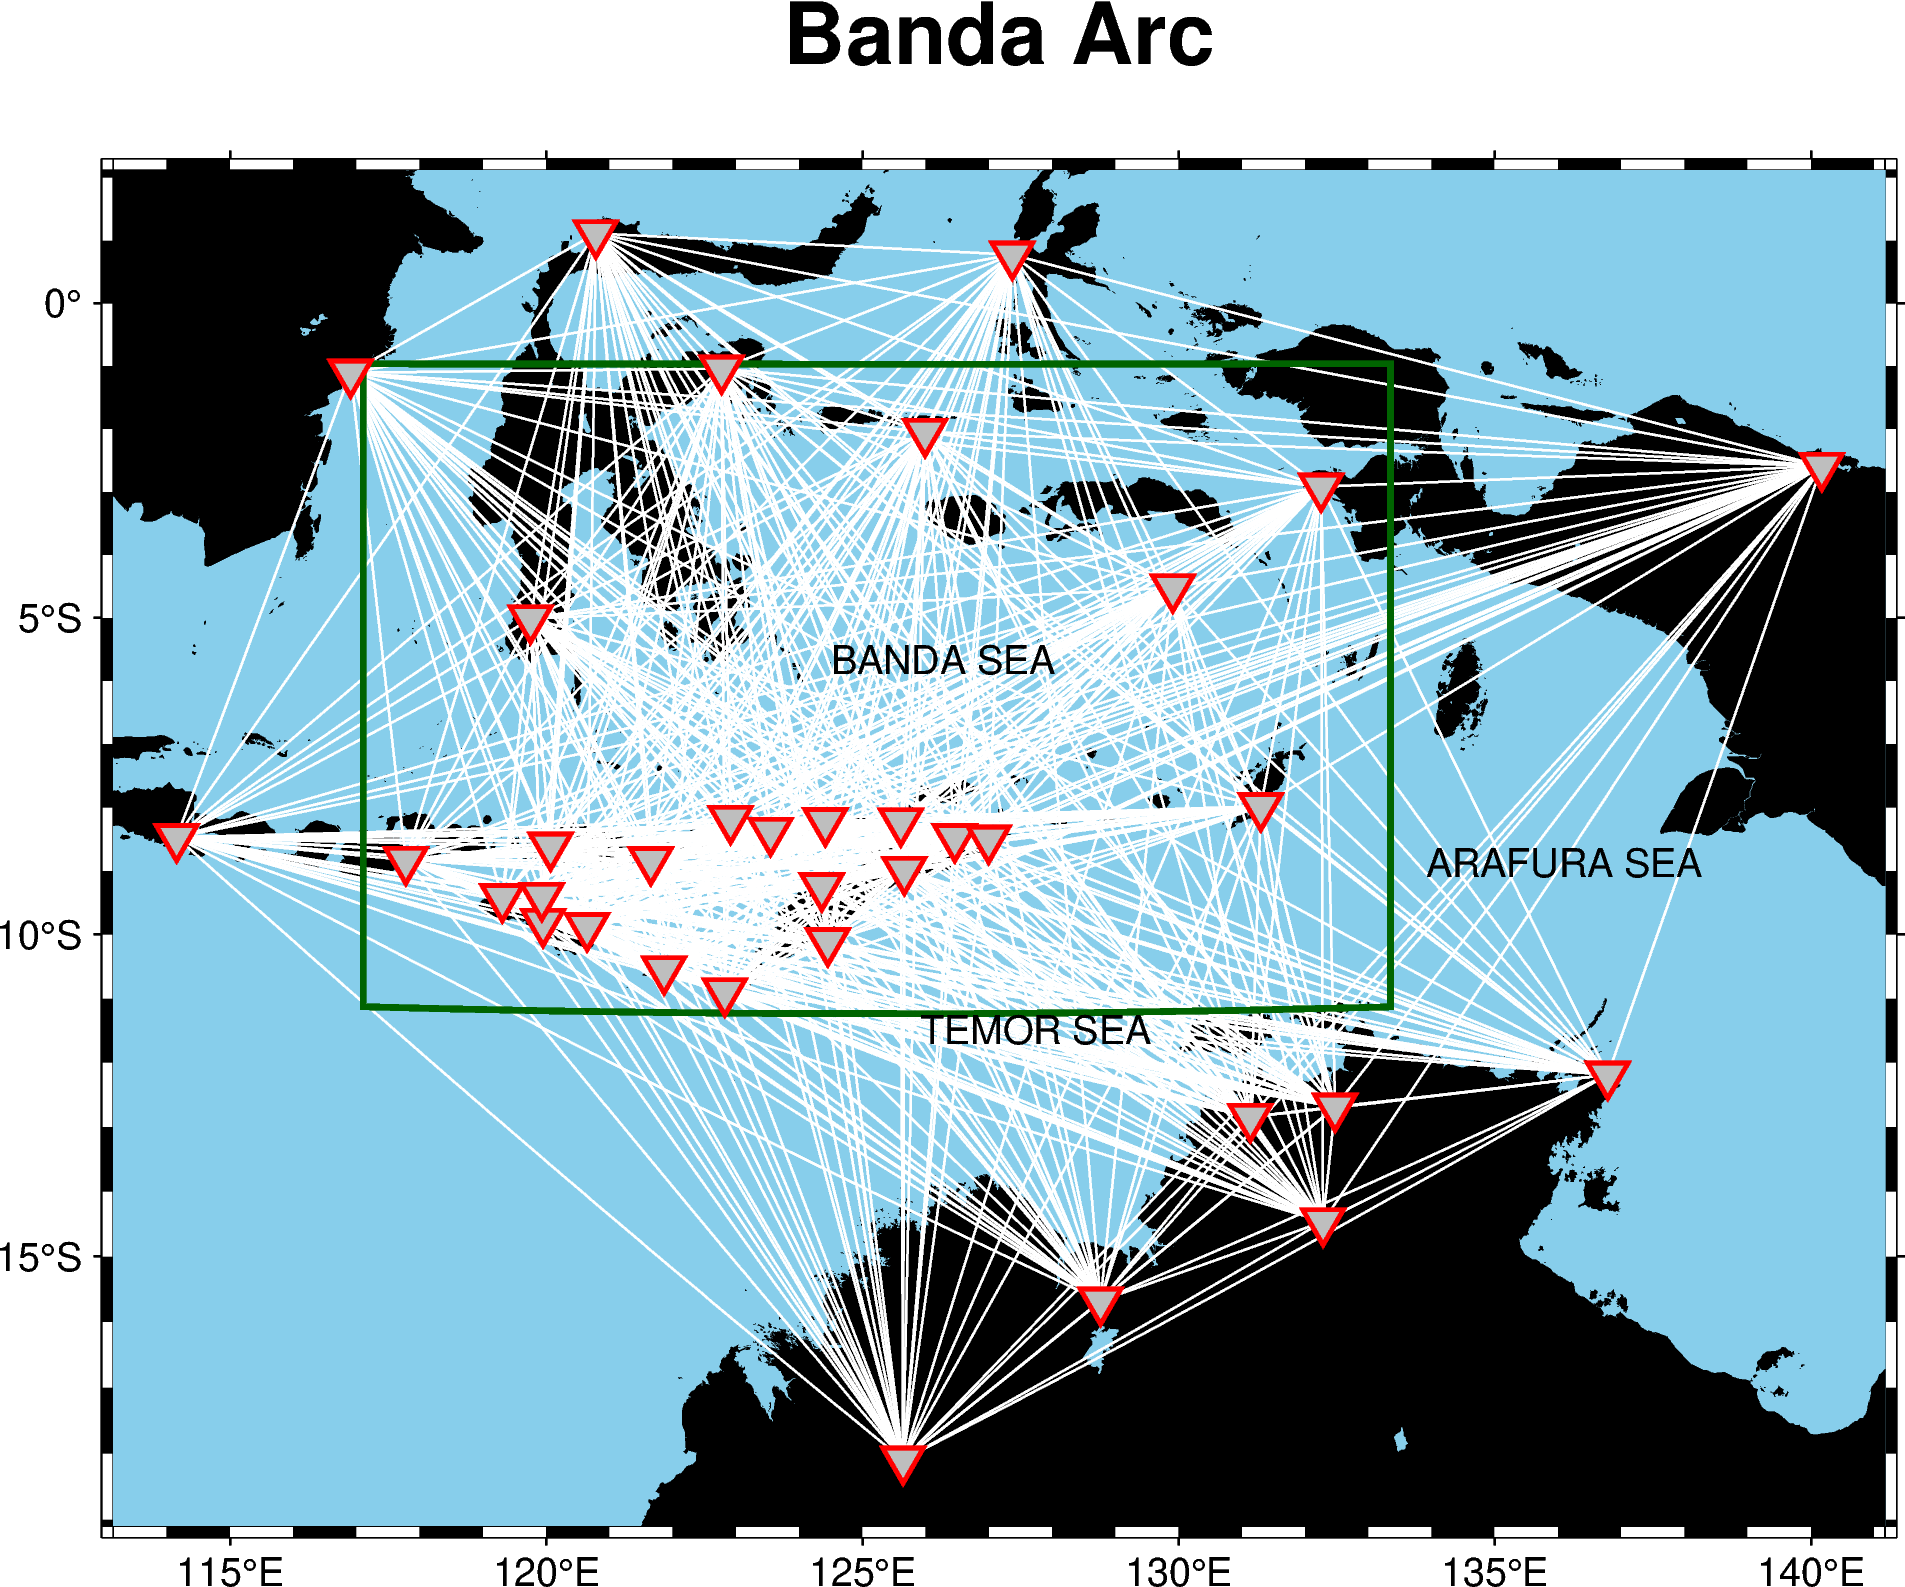

In [3]:
import pygmt
region = [
    df.longitude.min() - 1,
    df.longitude.max() + 1,
    df.latitude.min() - 1,
    df.latitude.max() + 1,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=['afg','+tBanda Arc'])
fig.coast(land="black", water="skyblue")

for i in range(len(df)): # plot the rays
    for j in range(i+1, len(df)):
        fig.plot(
            x=[df.longitude[i], df.longitude[j]],
            y=[df.latitude[i], df.latitude[j]],
            pen="0.5p,white")
fig.plot(
    x=[117.1072, 133.3494, 133.3494, 117.1072, 117.1072],
    y=[-11.1296, -11.1296, -0.9635, -0.9635, -11.1296],
    pen="1.5p,darkgreen"
    )

fig.plot(
    x=df.longitude,
    y=df.latitude,
    style="i0.4c",
    fill="grey",
    pen="1p,red")

fig.text(text=["BANDA SEA", "TEMOR SEA", "ARAFURA SEA"],
         x=[126.2743, 127.7332, 136.0922],
         y=[-5.6618, -11.475, -8.8693])
# fig.text(text=df.station, # name of stations
#          x=df.longitude,
#          y=df.latitude,
#          fill="white")
fig.show()
fig.savefig('rays.pdf')

**Check the distances**

In [129]:
for i in range(len(df)):
    for j in range(i+1, len(df)):
        deg = locations2degrees(df.latitude[i], df.longitude[i], df.latitude[j], df.longitude[j])
        dist = degrees2kilometers(deg)
        if dist < 100:
            print(dist, df.station[i], df.station[j])

96.80093316194606 ALRB HADA
72.73518082038345 HADA SINA
96.29223541599004 ONIX TL1B
85.15479057454863 TL04 TL05
97.69070315622517 TL04 TL06
58.695709109913594 TL06 TL08


In [140]:
# based on the data of df:
# we have the durationo of 2 years
starttime = UTCDateTime("2014-12-01 00:00:00")
endtime   = UTCDateTime("2016-12-31 00:00:00")